In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

In [ ]:
# Calculate taxonomy distribution (in krona format) (data is too large to show here)
'''
def krona_format(reffile,infile,outfile):
    import lzma
    taxonomy_dict = {}

    with open (outfile,"wt") as out:
        with lzma.open(infile,"rt") as f:
            for line in f:
                linelist = line.strip().split("\t")
                if len(linelist) == 2:
                    taxonomy = linelist[1].replace(";","\t")
                    if taxonomy in taxonomy_dict.keys():
                        taxonomy_dict[taxonomy] += 1
                    else:
                        taxonomy_dict[taxonomy] = 1
        for key,value in taxonomy_dict.items():
            out.write(f'{value}\t{key}\n')

infile = "./data/figure2/GMSC10.100AA.taxonomy.tsv"
outfile = "./data/figure2/100AA_krona.txt"
krona_format(infile,outfile)
'''

In [3]:
# Calculate propotion of taxonomy of 100AA smORFs
def cal_rank(infile,outfile):
    ALL = 964970496
    Super_kingdom = 0
    Phylum = 0
    Class = 0
    Order = 0
    Family = 0
    Genus = 0
    Species = 0
    
    with open(infile,"rt") as f:
        for line in f:
            linelist = line.strip().split("\t")
            if len(linelist) == 8:
                Species += int(linelist[0])
            elif len(linelist) == 7:
                Genus += int(linelist[0])    
            elif len(linelist) == 6:
                Family += int(linelist[0]) 
            elif len(linelist) == 5:
                Order += int(linelist[0]) 
            elif len(linelist) == 4:
                Class += int(linelist[0]) 
            elif len(linelist) == 3:
                Phylum += int(linelist[0]) 
            else:
                Super_kingdom += int(linelist[0])
                
    No_rank = ALL-Super_kingdom-Phylum-Class-Order-Family-Genus-Species
    
    with open(outfile,"wt") as out:
        out.write(f'Taxonomy\tSuper_kingdom\tPhylum\tClass\tOrder\tFamily\tGenus\tSpecies\tNo_rank\n')
        out.write(f'100AA\t{Super_kingdom}\t{Phylum}\t{Class}\t{Order}\t{Family}\t{Genus}\t{Species}\t{No_rank}\n')

infile = "./data/figure2/100AA_krona.txt"
outfile = "./data/figure2/100AA_statistic.txt"
cal_rank(infile,outfile)

In [6]:
df = pd.read_csv('./data/figure2/100AA_statistic.txt',sep='\t')
df

,Taxonomy,Super_kingdom,Phylum,Class,Order,Family,Genus,Species,No_rank
0,100AA,66924066,15612289,39105559,28210570,87914707,151163771,398478153,177561381


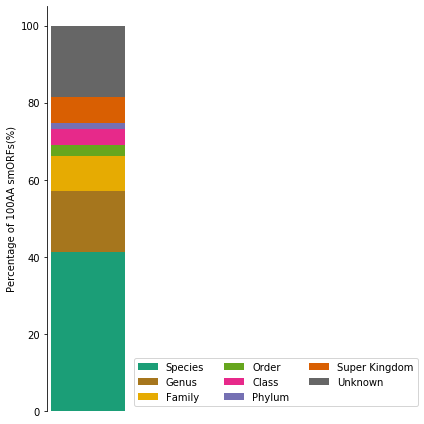

In [7]:
fig, ax = plt.subplots(figsize=(6,6))
ALL = 964970496
x = df['Taxonomy']
y8 = df['No_rank'] *100 / ALL
y7 = df['Super_kingdom'] *100/ ALL
y6 = df['Phylum'] *100/ ALL
y5 = df['Class'] *100/ ALL
y4 = df['Order'] *100/ ALL
y3 = df['Family'] *100/ ALL
y2 = df['Genus'] *100/ ALL
y1 = df['Species'] *100/ ALL

plt.bar(x,y1,color='#1b9e77',label='Species')
plt.bar(x,y2,bottom=y1,color='#a6761d',label='Genus')
plt.bar(x,y3,bottom=y1+y2,color='#e6ab02',label='Family')
plt.bar(x,y4,bottom=y1+y2+y3,color='#66a61e',label='Order')
plt.bar(x,y5,bottom=y1+y2+y3+y4,color='#e7298a',label='Class')
plt.bar(x,y6,bottom=y1+y2+y3+y4+y5,color='#7570b3',label='Phylum')
plt.bar(x,y7,bottom=y1+y2+y3+y4+y5+y6,color='#d95f02',label='Super Kingdom')
plt.bar(x,y8,bottom=y1+y2+y3+y4+y5+y6+y7,color='#666666',label='Unknown')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks([]) 
plt.ylabel('Percentage of 100AA smORFs(%)')
plt.legend(loc=3,bbox_to_anchor=(1,0),ncol=3)
plt.tight_layout()

In [17]:
df = pd.read_csv('./data/figure2/90AA_specific_multi.tsv',sep='\t',skiprows=[0],index_col=0)
df

,only,multi,specific
species-specific,38447970,0,0
genus-specific,8067292,6035567,38447970
family-specific,4377694,7301979,52550829
order-specific,1378469,1098364,64230502
class-specific,1966186,8131793,66707335
phylum-specific,712332,1965622,76805314
kingdom-specific,3213101,5635395,79483268


In [18]:
number_over2 = 96721815
df['only'] = df['only']/number_over2*100
df['multi'] = df['multi']/number_over2*100
df['specific'] = df['specific']/number_over2*100
df = df[['specific','multi','only']]
df

,specific,multi,only
species-specific,0.000000,0.000000,39.751084
genus-specific,39.751084,6.240130,8.340716
family-specific,54.331930,7.549464,4.526067
order-specific,66.407461,1.135591,1.425189
class-specific,68.968242,8.407403,2.032826
phylum-specific,79.408471,2.032243,0.736475
kingdom-specific,82.177188,5.826395,3.322002


<Figure size 288x144 with 0 Axes>

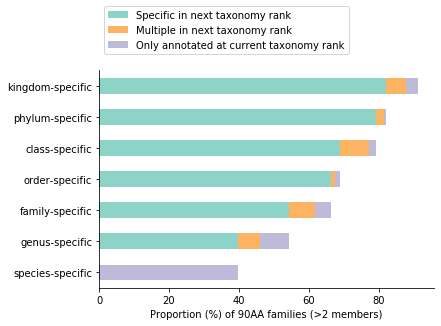

In [33]:
fig = plt.figure(figsize=(4, 2))
a = df.plot.barh(stacked=True,color=['#8dd3c7','#fdb462','#bebada'])
plt.xlabel('Proportion (%) of 90AA families (>2 members)')
plt.legend(['Specific in next taxonomy rank','Multiple in next taxonomy rank','Only annotated at current taxonomy rank'],loc=3,bbox_to_anchor=(0,1.05),ncol=1)
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)

In [ ]:
# filter and count cdd annotation (data is too large to show here)
#result = pd.read_csv('./data/figure2/90AA_cdd_tl.tsv.gz',compression='gzip',sep='\t',header=None,names=['smorf','cdd','query_length','score','align_length','identity','evalue','target_length'])
#result['tcov'] = result['align_length']/result['target_length']
#result = result[result['tcov'] >0.8]
#df = result.smorf.value_counts()
#bg_count = df.shape[0]
#bg_multi_count = df[df>1].shape[0]
#bg_perc = bg_count/287926875
#bg_multi_perc = bg_multi_count/287926875

#print(f'{bg_perc}({bg_count}/287926875) of 90AA smORFs are annotated with CDD.')
#print(f'{bg_multi_perc}({bg_multi_count}/287926875) of 90AA smORFs are annotated with multiple CDD.')

#bg_cdd_count = result.cdd.value_counts()
#bg_cdd_count = bg_cdd_count.to_frame(name='bg_count').reset_index().rename(columns={'index':'cdd'})

#bg_cdd_count['bg_percentage'] = bg_cdd_count['bg_count']/bg_cdd_count['bg_count'].sum()
#bg_cdd_count.to_csv('./data/figure2/2_cdd_count_tcov_bg.tsv',sep='\t',index=None)

In [38]:
# map cdd info
result = pd.read_csv('./data/figure2/2_cdd_count_tcov_bg.tsv',sep='\t',header=None,names=['PSSM_Id','GMSC_count','GMSC_fraction'],skiprows=1)
result['PSSM_Id'] = result['PSSM_Id'].apply(lambda x:x.split('|')[2])
result['PSSM_Id'] = result['PSSM_Id'].astype('int')
cdd = pd.read_csv('./data/figure2/cddid_all.tbl',sep='\t',header=None,names=['PSSM_Id','accession','short_name','description','PSSM_Length'])
result = result.merge(cdd,'left',on='PSSM_Id')
result
#result.to_csv('./data/figure2/3_bg_cdd_count_filter_info.tsv',sep='\t',index=None)

,PSSM_Id,GMSC_count,GMSC_fraction,accession,short_name,description,PSSM_Length
0,197775,577567,1.027059e-02,smart00530,HTH_XRE,Helix-turn-helix XRE-family like proteins.,56
1,238045,545668,9.703345e-03,cd00093,HTH_XRE,Helix-turn-helix XRE-family like proteins. Pro...,58
2,396104,528031,9.389715e-03,pfam01381,HTH_3,Helix-turn-helix. This large family of DNA bin...,55
3,100119,357456,6.356464e-03,cd06171,Sigma70_r4,"Sigma70, region (SR) 4 refers to the most C-te...",55
4,432748,353008,6.277367e-03,pfam12728,HTH_17,Helix-turn-helix domain. This domain is a DNA-...,51
...,...,...,...,...,...,...,...
20338,185018,1,1.778251e-08,PRK15058,PRK15058,cytochrome b562; Provisional,128
20339,407086,1,1.778251e-08,pfam16839,Antimicrobial25,Nematode antimicrobial peptide. This family of...,54
20340,197320,1,1.778251e-08,cd09086,ExoIII-like_AP-endo,Escherichia coli exonuclease III (ExoIII) and ...,254
20341,234834,1,1.778251e-08,PRK00777,PRK00777,pantetheine-phosphate adenylyltransferase.,153


In [67]:
# map Pfam clan A
def pfam2clan(infile1,infile2,outfile):
    pfam_dict = {}
    with open(infile1,'rt') as f1:
        for line in f1:
            linelist = line.strip().split('\t')
            pfam = linelist[0].replace('PF','')
            pfam_dict[pfam] = f'{linelist[1]}\t{linelist[2]}\t{linelist[4]}' 
    with open(outfile,'wt') as out:
        out.write(f'PSSM_Id\tGMSC_count\tGMSC_fraction\taccession\tshort_name\tdescription\tPSSM_Length\tclan_id\tclan\tshort_description\n')
        with open(infile2,'rt') as f2:
            for line in f2:
                if line.startswith('PSSM_Id'):
                    continue
                else:
                    line = line.replace('\n','')
                    linelist = line.split('\t')
                    pf = linelist[3].replace('pfam','')
                    if pf in pfam_dict.keys():
                        out.write(f'{line}\t{pfam_dict[pf]}\n')
                    else:
                        out.write(f'{line}\n')
                    
infile1 = './data/figure2/Pfam-A.clans.tsv'
infile2 = './data/figure2/3_bg_cdd_count_filter_info.tsv'
outfile = './data/figure2/4_bg_cdd_clan_A.tsv'
pfam2clan(infile1,infile2,outfile)

In [70]:
# map Pfam clan C description
df = pd.read_csv('./data/figure2/4_bg_cdd_clan_A.tsv',sep='\t')
df = df[df['accession'].str.startswith('pfam')]
clan_c = pd.read_csv('./data/figure2/pfam-c_format.txt',sep='\t',header=None,dtype=str,names=['accession','clan','clan_description'])
df['accession'] = df['accession'].str.replace('pfam','')
df=clan_c.merge(df,'right',on=['accession','clan'])
df
#df.to_csv('./data/figure2/5_bg_pfam_clan_A_C.tsv',sep='\t',index=None)

,accession,clan,clan_description,PSSM_Id,GMSC_count,GMSC_fraction,short_name,description,PSSM_Length,clan_id,short_description
0,01381,HTH,Helix-turn-helix clan,396104,528031,9.389715e-03,HTH_3,Helix-turn-helix. This large family of DNA bin...,55,CL0123,Helix-turn-helix
1,12728,HTH,Helix-turn-helix clan,432748,353008,6.277367e-03,HTH_17,Helix-turn-helix domain. This domain is a DNA-...,51,CL0123,Helix-turn-helix domain
2,08281,HTH,Helix-turn-helix clan,400535,350695,6.236236e-03,Sigma70_r4_2,"Sigma-70, region 4. Region 4 of sigma-70 like ...",54,CL0123,"Sigma-70, region 4"
3,04545,HTH,Helix-turn-helix clan,427999,342291,6.086792e-03,Sigma70_r4,"Sigma-70, region 4. Region 4 of sigma-70 like ...",50,CL0123,"Sigma-70, region 4"
4,12844,HTH,Helix-turn-helix clan,403907,318144,5.657398e-03,HTH_19,Helix-turn-helix domain. Members of this famil...,64,CL0123,Helix-turn-helix domain
...,...,...,...,...,...,...,...,...,...,...,...
7695,08216,TPR,Tetratrico peptide repeat superfamily,429869,1,1.778251e-08,CTNNBL,"Catenin-beta-like, Arm-motif containing nuclea...",104,CL0020,"Catenin-beta-like, Arm-motif containing nuclear"
7696,12618,NaN,NaN,432674,1,1.778251e-08,DUF3776,Protein of unknown function (DUF3776). This do...,105,NaN,Protein of unknown function (DUF3776)
7697,10497,NaN,NaN,431318,1,1.778251e-08,zf-4CXXC_R1,Zinc-finger domain of monoamine-oxidase A repr...,99,NaN,Zinc-finger domain of monoamine-oxidase A repr...
7698,01252,NaN,NaN,426157,1,1.778251e-08,Peptidase_A8,Signal peptidase (SPase) II.,140,NaN,Signal peptidase (SPase) II


In [71]:
# group ribosomal unknown function protein
def modify(infile,outfile):
    with open(outfile,'wt') as out:
        with open(infile,'rt') as f:
            for line in f:
                line = line.strip()
                if line.startswith('accession'):
                    out.write(f'{line}\tgroup\n')
                else:
                    linelist = line.split('\t')
                    if 'ribosomal' in linelist[-1].casefold():
                        out.write(f'{line}\tRibosomal protein\n')
                    else:
                        if linelist[1]!='':
                            if linelist[2]!='':
                                out.write(f'{line}\t{linelist[2]}\n')
                            else:
                                out.write(f'{line}\t{linelist[1]}\n')
                        else:
                            if 'uncharacterised' in linelist[-1].casefold() or 'unknown' in linelist[-1].casefold():
                                out.write(f'{line}\tDomain of unknown function\n')
                            else:
                                group = linelist[-1].split(',')[0]
                                out.write(f'{line}\t{group}\n')          

infile = './data/figure2/5_bg_pfam_clan_A_C.tsv'
outfile = './data/figure2/6_bg_pfam_clan_A_C_group.tsv'
modify(infile,outfile)

In [2]:
# plot top 20 pfam
df = pd.read_csv('./data/figure2/6_bg_pfam_clan_A_C_group.tsv',sep='\t')
df = df[:20:]
df = df.sort_values('GMSC_count')
df

,accession,clan,clan_description,PSSM_Id,GMSC_count,GMSC_fraction,short_name,description,PSSM_Length,clan_id,short_description,group
19,462,Thioredoxin,Thioredoxin-like,425695,92031,0.001637,Glutaredoxin,Glutaredoxin.,60,CL0172,Glutaredoxin,Thioredoxin-like
18,216,IHF-likeDNA-bdg,IHF-like DNA-binding protein superfamily,425532,95390,0.001696,Bac_DNA_binding,Bacterial DNA-binding protein.,88,CL0548,Bacterial DNA-binding protein,IHF-like DNA-binding protein superfamily
17,12833,HTH,Helix-turn-helix clan,432818,101150,0.001799,HTH_18,Helix-turn-helix domain.,81,CL0123,Helix-turn-helix domain,Helix-turn-helix clan
16,5016,Plasmid-antitox,Plasmid toxin-antitoxin system,398610,102079,0.001815,ParE_toxin,"ParE toxin of type II toxin-antitoxin system, ...",91,CL0136,"ParE toxin of type II toxin-antitoxin system, ...",Plasmid toxin-antitoxin system
15,12399,P-loop_NTPase,P-loop containing nucleoside triphosphate hydr...,432527,125002,0.002223,BCA_ABC_TP_C,Branched-chain amino acid ATP-binding cassette...,23,CL0023,Branched-chain amino acid ATP-binding cassette...,P-loop containing nucleoside triphosphate hydr...
14,4014,AbrB,AbrB/MraZ DNA-binding domain,397909,125496,0.002232,MazE_antitoxin,"Antidote-toxin recognition MazE, bacterial ant...",44,CL0132,"Antidote-toxin recognition MazE, bacterial ant...",AbrB/MraZ DNA-binding domain
13,313,OB,OB fold,278729,126027,0.002241,CSD,'Cold-shock' DNA-binding domain.,66,CL0021,'Cold-shock' DNA-binding domain,OB fold
12,2597,Ubiquitin,Ubiquitin superfamily,396932,127699,0.002271,ThiS,ThiS family. ThiS (thiaminS) is a 66 aa protei...,74,CL0072,ThiS family,Ubiquitin superfamily
11,550,PP-binding,ACP-like superfamily,425746,137566,0.002446,PP-binding,Phosphopantetheine attachment site. A 4'-phosp...,62,CL0314,Phosphopantetheine attachment site,ACP-like superfamily
10,165,HTH,Helix-turn-helix clan,425497,138807,0.002468,HTH_AraC,Bacterial regulatory helix-turn-helix proteins...,42,CL0123,Bacterial regulatory helix-turn-helix proteins...,Helix-turn-helix clan


D:\ANACONDA\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
D:\ANACONDA\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


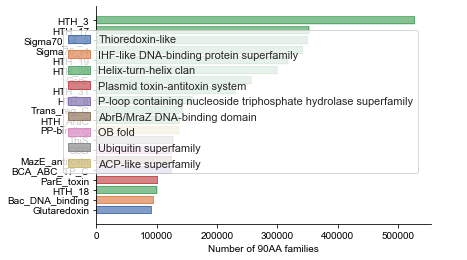

In [74]:
import seaborn.objects as so

f, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

p = (
    so.Plot(df, x="GMSC_count",y="short_name", color="group")
    .add(so.Bar())
    .label(x="Number of 90AA families", y="",color="")
    .theme({"axes.facecolor": "w", "axes.edgecolor": "black",'axes.linewidth':0.5})
)

p.on(ax).show()

In [5]:
df = pd.read_csv(r'./data/figure2/multi_genus.csv')
df['multi_specific_fold_change'] = df['multi_proportion']/df['specific_proportion']
df['multi_whole_fold_change'] = df['multi_proportion']/df['whole_proportion']
df['specific_whole_fold_change'] = df['specific_proportion']/df['whole_proportion']
#df.to_csv(r'./data/figure2/multi_genus_fc.csv',index=None)
df

,group,multi_count,multi_all,specific_count,specific_all,whole_count,whole_all,multi_proportion,specific_proportion,whole_proportion,multi_specific_fold_change,multi_whole_fold_change,specific_whole_fold_change
0,genus_habitat,15370429,24858647,26655266,52550829,50312115,96721815,0.618313,0.507228,0.520173,1.219004,1.188667,0.975114
1,genus_cdd,2761377,24858647,4227592,52550829,8188931,96721815,0.111083,0.080448,0.084665,1.380813,1.312035,0.950191
2,genus_pfam,2465115,24858647,3756398,52550829,7270730,96721815,0.099165,0.071481,0.075172,1.387291,1.319186,0.950908


In [6]:
# calculate pvalue
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency

def enrichment(N, n, M, m):
    from scipy.stats import hypergeom
    return hypergeom.sf(n-1,M,m,N)

def cal(infile,outfile):
    out = open(outfile,'wt')
    with open(infile,'rt') as f:
        for line in f:
            if line.startswith('group'):
                out.write(f'{line.strip()},p_fisher,p_chi2,p_hypergeom_multi,p_hypergeom_specific\n')
            else:
                group,multi_count,multi_all,specific_count,specific_all,whole_count,whole_all,multi_proportion,specific_proportion,whole_proportion,multi_specific_fold_change,multi_whole_fold_change,specific_whole_fold_change = line.strip().split(',')
                multi_count = int(multi_count)
                specific_count = int(specific_count)
                multi_count_no = int(multi_all)-multi_count
                specific_count_no = int(specific_all)-specific_count
                
                res_fisher = fisher_exact([[multi_count,specific_count], [multi_count_no, specific_count_no]])
                res_chi2 = chi2_contingency([[multi_count,specific_count], [multi_count_no, specific_count_no]])
                multi_pvalue = enrichment(int(multi_all),int(multi_count),int(whole_all),int(whole_count))
                specific_pvalue = enrichment(int(specific_all),int(specific_count),int(whole_all),int(whole_count))
                
                out.write(f'{line.strip()},{res_fisher.pvalue},{res_chi2.pvalue},{multi_pvalue},{specific_pvalue}\n')
    out.close()


infile = r'./data/figure2/multi_genus_fc.csv'
outfile = r'./data/figure2/multi_genus_fc_p.csv'
cal(infile,outfile)

In [8]:
# p adjust (bonferroni)
from statsmodels.stats.multitest import multipletests
result = pd.read_csv(r'./data/figure2/multi_genus_fc_p.csv')
rejected, p_adjusted, _, alpha_corrected = multipletests(result['p_fisher'], method='bonferroni')
result['p_adjusted_fisher'] = p_adjusted
rejected, p_adjusted, _, alpha_corrected = multipletests(result['p_chi2'], method='bonferroni')
result['p_adjusted_chi2'] = p_adjusted
rejected, p_adjusted, _, alpha_corrected = multipletests(result['p_hypergeom_multi'], method='bonferroni')
result['p_adjusted_hypergeom_multi'] = p_adjusted
rejected, p_adjusted, _, alpha_corrected = multipletests(result['p_hypergeom_specific'], method='bonferroni')
result['p_adjusted_hypergeom_specific'] = p_adjusted

result

,group,multi_count,multi_all,specific_count,specific_all,whole_count,whole_all,multi_proportion,specific_proportion,whole_proportion,...,multi_whole_fold_change,specific_whole_fold_change,p_fisher,p_chi2,p_hypergeom_multi,p_hypergeom_specific,p_adjusted_fisher,p_adjusted_chi2,p_adjusted_hypergeom_multi,p_adjusted_hypergeom_specific
0,genus_habitat,15370429,24858647,26655266,52550829,50312115,96721815,0.618313,0.507228,0.520173,...,1.188667,0.975114,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,genus_cdd,2761377,24858647,4227592,52550829,8188931,96721815,0.111083,0.080448,0.084665,...,1.312035,0.950191,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,genus_pfam,2465115,24858647,3756398,52550829,7270730,96721815,0.099165,0.071481,0.075172,...,1.319186,0.950908,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [6]:
df = pd.read_csv(r'./data/figure2/multi_genus_size.csv')
df['multi_whole_fold_change'] = df['multi_proportion']/df['whole_proportion']
df

,group,multi_count,multi_all,whole_count,whole_all,multi_proportion,whole_proportion,multi_whole_fold_change
0,habitat,15370429,24858647,14306307,24858647,0.618313,0.575506,1.074381
1,cdd,2761377,24858647,2277146,24858647,0.111083,0.091604,1.212646
2,pfam,2465115,24858647,2027995,24858647,0.099165,0.081581,1.215539


In [9]:
# calculate pvalue
def enrichment(N, n, M, m):
    from scipy.stats import hypergeom
    return hypergeom.sf(n-1,M,m,N)

def cal(infile,outfile):
    out = open(outfile,'wt')
    with open(infile,'rt') as f:
        for line in f:
            if line.startswith('group'):
                out.write(f'{line.strip()},p_hypergeom_multi\n')
            else:
                group,multi_count,multi_all,whole_count,whole_all,multi_proportion,whole_proportion,fc = line.strip().split(',')
                multi_count = int(multi_count)
                multi_count_no = int(multi_all)-multi_count
                
                multi_pvalue = enrichment(int(multi_all),int(multi_count),int(whole_all),int(whole_count))
                
                out.write(f'{line.strip()},{multi_pvalue}\n')
    out.close()


infile = r'./data/figure2/multi_genus_size_fc.csv'
outfile = r'./data/figure2/multi_genus_size_fc_p.csv'
cal(infile,outfile)

In [11]:
# calculate pvalue
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency

def enrichment(N, n, M, m):
    from scipy.stats import hypergeom
    return hypergeom.sf(n-1,M,m,N)

def cal(infile,outfile):
    out = open(outfile,'wt')
    with open(infile,'rt') as f:
        for line in f:
            if line.startswith('group'):
                out.write(f'{line.strip()},p_fisher,p_chi2\n')
            else:
                group,multi_count,multi_all,specific_count,specific_all,multi_proportion,specific_proportion,multi_specific_fold_change = line.strip().split(',')
                multi_count = int(multi_count)
                specific_count = int(specific_count)
                multi_count_no = int(multi_all)-multi_count
                specific_count_no = int(specific_all)-specific_count
                
                res_fisher = fisher_exact([[multi_count,specific_count], [multi_count_no, specific_count_no]])
                res_chi2 = chi2_contingency([[multi_count,specific_count], [multi_count_no, specific_count_no]])
                
                out.write(f'{line.strip()},{res_fisher.pvalue},{res_chi2.pvalue}\n')
    out.close()


infile = r'./data/figure2/multi_genus_size_fc.csv'
outfile = r'./data/figure2/multi_genus_size_fc_p.csv'
cal(infile,outfile)

In [10]:
# p adjust (bonferroni)
from statsmodels.stats.multitest import multipletests
result = pd.read_csv(r'./data/figure2/whole_multi_genus_p.csv')
rejected, p_adjusted, _, alpha_corrected = multipletests(result['p_hypergeom_multi'], method='bonferroni')
result['p_adjusted_hypergeom_multi'] = p_adjusted
result

,group,multi_count,multi_all,whole_count,whole_all,multi_proportion,whole_proportion,p_hypergeom_multi,p_adjusted_hypergeom_multi
0,habitat,15370429,24858647,14306307,24858647,0.618313,0.575506,0.0,0.0
1,cdd,2761377,24858647,2277146,24858647,0.111083,0.091604,0.0,0.0
2,pfam,2465115,24858647,2027995,24858647,0.099165,0.081581,0.0,0.0


In [14]:
multi_genus = pd.read_csv(r'./data/figure2/multi_genus_3_pfam_group_count.tsv',sep='\t')
multi_genus

,group,multi_genus_count,all_multi_genus
0,Ig-like fold superfamily (E-set),10512,2465115
1,Sm (Small RNA binding protein domain),6020,2465115
2,Rof/RNase P subunit-like superfamily,509,2465115
3,Ribosomal protein,242499,2465115
4,4Fe-4S ferredoxins,34316,2465115
...,...,...,...
1961,Terminase small subunit,1,2465115
1962,TerB-C domain,1,2465115
1963,Alpha-lytic protease prodomain,1,2465115
1964,Dihydroneopterin aldolase,1,2465115


In [15]:
all_count = pd.read_csv(r'./data/figure2/90AA_multi_habitat_pfam_group_count.tsv',sep='\t')
all_count

,group,whole_count,whole_all
0,RNA polymerase Rpb5,1764,7270730
1,AbrB/MraZ DNA-binding domain,58900,7270730
2,Zinc beta-ribbon,104385,7270730
3,PRC-barrel like superfamily,11496,7270730
4,Ig-like fold superfamily (E-set),48528,7270730
...,...,...,...
2775,CheY-binding domain of CheA superfamily,1,7270730
2776,Putative mitochondrial precursor protein,1,7270730
2777,Terminase small subunit,1,7270730
2778,Alpha-lytic protease prodomain,2,7270730


In [16]:
df = multi_genus.merge(all_count,'left',on='group')
df

,group,multi_genus_count,all_multi_genus,whole_count,whole_all
0,Ig-like fold superfamily (E-set),10512,2465115,48528,7270730
1,Sm (Small RNA binding protein domain),6020,2465115,15414,7270730
2,Rof/RNase P subunit-like superfamily,509,2465115,2067,7270730
3,Ribosomal protein,242499,2465115,587850,7270730
4,4Fe-4S ferredoxins,34316,2465115,85419,7270730
...,...,...,...,...,...
1961,Terminase small subunit,1,2465115,1,7270730
1962,TerB-C domain,1,2465115,2,7270730
1963,Alpha-lytic protease prodomain,1,2465115,2,7270730
1964,Dihydroneopterin aldolase,1,2465115,25,7270730


In [17]:
df['multi_genus_proportion'] = df['multi_genus_count']/df['all_multi_genus']
df['whole_proportion'] = df['whole_count']/df['whole_all']
df['fold_change'] = df['multi_genus_proportion']/df['whole_proportion']

#df.to_csv(r'./data/figure2/multi_genus_pfam_group.tsv',index=None,sep='\t')
df

,group,multi_genus_count,all_multi_genus,whole_count,whole_all,multi_genus_proportion,whole_proportion,fold_change
0,Ig-like fold superfamily (E-set),10512,2465115,48528,7270730,4.264304e-03,6.674433e-03,0.638901
1,Sm (Small RNA binding protein domain),6020,2465115,15414,7270730,2.442077e-03,2.120007e-03,1.151919
2,Rof/RNase P subunit-like superfamily,509,2465115,2067,7270730,2.064812e-04,2.842906e-04,0.726304
3,Ribosomal protein,242499,2465115,587850,7270730,9.837229e-02,8.085158e-02,1.216702
4,4Fe-4S ferredoxins,34316,2465115,85419,7270730,1.392065e-02,1.174834e-02,1.184904
...,...,...,...,...,...,...,...,...
1961,Terminase small subunit,1,2465115,1,7270730,4.056606e-07,1.375378e-07,2.949449
1962,TerB-C domain,1,2465115,2,7270730,4.056606e-07,2.750755e-07,1.474724
1963,Alpha-lytic protease prodomain,1,2465115,2,7270730,4.056606e-07,2.750755e-07,1.474724
1964,Dihydroneopterin aldolase,1,2465115,25,7270730,4.056606e-07,3.438444e-06,0.117978


In [18]:
# calculate pvalue
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency

def enrichment(N, n, M, m):
    from scipy.stats import hypergeom
    return hypergeom.sf(n-1,M,m,N)

def cal(infile,outfile):
    out = open(outfile,'wt')
    with open(infile,'rt') as f:
        for line in f:
            if line.startswith('group'):
                out.write(f'{line.strip()}\tp_hypergeom\n')
            else:
                group,multi_genus_count,all_multi_genus,whole_count,whole_all,multi_genus_proportion,whole_proportion,fold_change = line.strip().split('\t')
                multi_pvalue = enrichment(int(all_multi_genus),int(multi_genus_count),int(whole_all),int(whole_count))                
                out.write(f'{line.strip()}\t{multi_pvalue}\n')
    out.close()


infile = r'./data/figure2/multi_genus_pfam_group.tsv'
outfile = r'./data/figure2/multi_genus_pfam_group_p.tsv'
cal(infile,outfile)

In [19]:
# p adjust (bonferroni)
from statsmodels.stats.multitest import multipletests
result = pd.read_csv(r'./data/figure2/multi_genus_pfam_group_p.tsv',sep='\t')
rejected, p_adjusted, _, alpha_corrected = multipletests(result['p_hypergeom'], method='bonferroni')
result['p_hypergeom_adujst'] = p_adjusted
#result.to_csv(r'./data/figure2/multi_genus_pfam_group_p_adjust.tsv',index=None,sep='\t')
result

,group,multi_genus_count,all_multi_genus,whole_count,whole_all,multi_genus_proportion,whole_proportion,fold_change,p_hypergeom,p_hypergeom_adujst
0,Ig-like fold superfamily (E-set),10512,2465115,48528,7270730,4.264304e-03,6.674433e-03,0.638901,1.000000e+00,1.000000e+00
1,Sm (Small RNA binding protein domain),6020,2465115,15414,7270730,2.442077e-03,2.120007e-03,1.151919,4.746222e-41,9.331073e-38
2,Rof/RNase P subunit-like superfamily,509,2465115,2067,7270730,2.064812e-04,2.842906e-04,0.726304,1.000000e+00,1.000000e+00
3,Ribosomal protein,242499,2465115,587850,7270730,9.837229e-02,8.085158e-02,1.216702,0.000000e+00,0.000000e+00
4,4Fe-4S ferredoxins,34316,2465115,85419,7270730,1.392065e-02,1.174834e-02,1.184904,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
1961,Terminase small subunit,1,2465115,1,7270730,4.056606e-07,1.375378e-07,2.949449,3.390464e-01,1.000000e+00
1962,TerB-C domain,1,2465115,2,7270730,4.056606e-07,2.750755e-07,1.474724,5.631404e-01,1.000000e+00
1963,Alpha-lytic protease prodomain,1,2465115,2,7270730,4.056606e-07,2.750755e-07,1.474724,5.631404e-01,1.000000e+00
1964,Dihydroneopterin aldolase,1,2465115,25,7270730,4.056606e-07,3.438444e-06,0.117978,9.999681e-01,1.000000e+00


In [20]:
sig = result[result['p_hypergeom_adujst']<0.05]
sig = sig.sort_values('multi_genus_count',ascending=False)
sig = sig[:10]
sig['multi_genus_count'] = sig['multi_genus_count']/1000
sig

,group,multi_genus_count,all_multi_genus,whole_count,whole_all,multi_genus_proportion,whole_proportion,fold_change,p_hypergeom,p_hypergeom_adujst
12,Helix-turn-helix clan,463.070,2465115,1299568,7270730,0.187849,0.178740,1.050966,0.000000e+00,0.000000e+00
3,Ribosomal protein,242.499,2465115,587850,7270730,0.098372,0.080852,1.216702,0.000000e+00,0.000000e+00
11,Domain of unknown function,234.646,2465115,666645,7270730,0.095187,0.091689,1.038148,8.201542e-121,1.612423e-117
25,OB fold,89.637,2465115,229357,7270730,0.036362,0.031545,1.152700,0.000000e+00,0.000000e+00
16,Plasmid toxin-antitoxin system,51.616,2465115,131891,7270730,0.020939,0.018140,1.154277,0.000000e+00,0.000000e+00
5,"MetJ/Arc repressor, antitoxin of TA systems su...",42.617,2465115,103300,7270730,0.017288,0.014208,1.216812,0.000000e+00,0.000000e+00
39,Dimeric alpha/beta barrel superfamily,40.681,2465115,110938,7270730,0.016503,0.015258,1.081564,7.486382e-85,1.471823e-81
13,Zinc beta-ribbon,37.446,2465115,104385,7270730,0.015190,0.014357,1.058055,1.203412e-41,2.365908e-38
400,P-loop containing nucleoside triphosphate hydr...,34.796,2465115,90552,7270730,0.014115,0.012454,1.133371,1.026840e-180,2.018768e-177
4,4Fe-4S ferredoxins,34.316,2465115,85419,7270730,0.013921,0.011748,1.184904,0.000000e+00,0.000000e+00


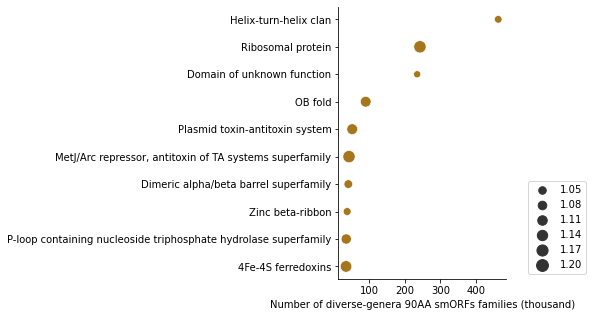

In [21]:
fig, ax = plt.subplots(figsize=(3,5))
ax = sns.scatterplot(data=sig, y="group", x="multi_genus_count",size='fold_change',sizes=(50,150),color='#a6761d')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel('')
plt.xlabel('Number of diverse-genera 90AA smORFs families (thousand)')
plt.legend(loc=3,bbox_to_anchor=(1.1,0),ncol=1)

# Multi-phylum

In [1]:
# map Pfam clan A
def pfam2clan(infile1,infile2,outfile):
    pfam_dict = {}
    with open(infile1,'rt') as f1:
        for line in f1:
            linelist = line.strip().split('\t')
            pfam = linelist[0].replace('PF','')
            pfam_dict[pfam] = f'{linelist[1]}\t{linelist[2]}\t{linelist[4]}'  
    with open(outfile,'wt') as out:
        with open(infile2,'rt') as f2:
            for line in f2:
                if line.startswith('smorf'):
                    out.write(f'{line.strip()}\tclan_id\tclan\tshort_description\n')
                else:
                    line = line.replace('\n','')
                    linelist = line.split('\t')
                    pf = linelist[14].replace('pfam','')
                    if pf in pfam_dict.keys():
                        out.write(f'{line}\t{pfam_dict[pf]}\n')
                    else:
                        out.write(f'{line}\n')
infile1 = './data/figure2/Pfam-A.clans.tsv'
infile2 = './data/figure2/housekeeping_motif_species_multi_phylum_all.tsv'
outfile = './data/figure2/housekeeping_motif_species_multi_phylum_all_clan_A.tsv'
pfam2clan (infile1,infile2,outfile)

In [2]:
# map Pfam clan C description
#df = pd.read_csv('./data/figure2/housekeeping_motif_species_multi_phylum_all_clan_A.tsv',sep='\t')
#clan_c = pd.read_csv('./data/figure2/pfam-c_format.txt',sep='\t',header=None,dtype=str,names=['accession','clan','clan_description'])
#df['accession'] = df['accession'].str.replace('pfam','')
#df=clan_c.merge(df,'right',on=['accession','clan'])
#df
#df.to_csv('./data/figure2/housekeeping_motif_species_multi_phylum_all_clan_A_C.tsv',sep='\t',index=None)
def map_clan_c(infile1,infile2,outfile):
    pfam_dict = {}
    with open(infile1,'rt') as f1:
        for line in f1:
            linelist = line.strip().split('\t')
            pfam_dict[linelist[1]] = linelist[2]
    with open(outfile,'wt') as out:
        with open(infile2,'rt') as f2:
            for line in f2:
                line = line.strip()
                if line.startswith('smorf'):
                    out.write(f'{line}\tclan_description\n')
                else:
                    linelist = line.split('\t')  
                    if len(linelist) == 21 and linelist[-2] in pfam_dict.keys():
                        out.write(f'{line}\t{pfam_dict[linelist[-2]]}\n')
                    else:
                        out.write(f'{line}\n')
                

infile1 =  './data/figure2/pfam-c_format.txt'
infile2 = './data/figure2/housekeeping_motif_species_multi_phylum_all_clan_A.tsv'
outfile = './data/figure2/housekeeping_motif_species_multi_phylum_all_clan_A_C.tsv'
map_clan_c(infile1,infile2,outfile)

In [3]:
# group ribosomal and unknown proteins
def modify(infile,outfile):
    with open(outfile,'wt') as out:
        with open(infile,'rt') as f:
            for line in f:
                line = line.strip()
                if line.startswith('smorf'):
                    out.write(f'group\t{line}\n')
                else:
                    linelist = line.split('\t')
                    if len(linelist) >20:
                        if len(linelist) == 21:
                            if 'ribosomal' in linelist[-1].casefold():
                                out.write(f'Ribosomal protein\t{line}\n')
                            elif 'uncharacterised' in linelist[-1].casefold() or 'unknown' in linelist[-1].casefold():
                                out.write(f'Domain of unknown function\t{line}\n')
                            else:
                                group = linelist[-1].split(',')[0]
                                out.write(f'{group}\t{line}\n')                                
                        else:
                            if 'ribosomal' in linelist[-2].casefold():
                                out.write(f'Ribosomal protein\t{line}\n')
                            else:
                                out.write(f'{linelist[-1]}\t{line}\n')
                    else:
                        out.write(f'\t{line}\n')

infile = './data/figure2/housekeeping_motif_species_multi_phylum_all_clan_A_C.tsv'
outfile = './data/figure2/housekeeping_motif_species_multi_phylum_all_clan_A_C_group.tsv'
modify(infile,outfile)

In [4]:
# plot pfam distribution of multi-phylum 90AA families
import pandas as pd
df = pd.read_csv('./data/figure2/housekeeping_motif_species_multi_phylum_all_clan_A_C_group.tsv',sep='\t')
df

,group,smorf,multi,specific,smorf number of family,species_number,cdd,query_length,score,align_length,...,tcov,habitat,accession,short_name,description,PSSM_Length,clan_id,clan,short_description,clan_description
0,NaN,GMSC10.90AA.000_237_801_047,phylum-multi,kingdom-specific,18,4,179901.0,66.0,281.0,66.0,...,1.000000,"built environment,cattle rumen,chicken gut,fer...",PRK04964,PRK04964,hypothetical protein; Provisional,66.0,NaN,NaN,NaN,NaN
1,Domain of unknown function,GMSC10.90AA.000_237_801_047,phylum-multi,kingdom-specific,18,4,429118.0,66.0,262.0,65.0,...,1.000000,"built environment,cattle rumen,chicken gut,fer...",pfam06786,UPF0253,Uncharacterized protein family (UPF0253).,65.0,NaN,NaN,Uncharacterised protein family (UPF0253),NaN
2,NaN,GMSC10.90AA.000_266_609_052,phylum-multi,kingdom-specific,42,2,NaN,NaN,NaN,NaN,...,NaN,"activated sludge,air,anthropogenic,built envir...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ribosomal protein,GMSC10.90AA.000_287_853_489,phylum-multi,kingdom-specific,156,17,426430.0,59.0,185.0,55.0,...,0.982143,"air,bird gut,built environment,cat gut,cattle ...",pfam01783,Ribosomal_L32p,Ribosomal L32p protein family.,56.0,CL0167,Zn_Beta_Ribbon,Ribosomal L32p protein family,Zinc beta-ribbon
4,NaN,GMSC10.90AA.000_287_853_489,phylum-multi,kingdom-specific,156,17,223410.0,59.0,157.0,54.0,...,0.947368,"air,bird gut,built environment,cat gut,cattle ...",COG0333,RpmF,"Ribosomal protein L32 [Translation, ribosomal ...",57.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4875,NaN,GMSC10.90AA.000_286_907_983,phylum-multi,kingdom-specific,28,2,NaN,NaN,NaN,NaN,...,NaN,"air,beatle gut,built environment,fermented foo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4876,NaN,GMSC10.90AA.000_251_222_936,phylum-multi,kingdom-specific,28,2,NaN,NaN,NaN,NaN,...,NaN,"activated sludge,air,cattle gut,fermented food...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4877,NaN,GMSC10.90AA.000_287_514_707,phylum-multi,kingdom-specific,73,22,NaN,NaN,NaN,NaN,...,NaN,"activated sludge,air,bee gut,built environment...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4878,NaN,GMSC10.90AA.000_277_364_808,phylum-multi,kingdom-specific,12,1,NaN,NaN,NaN,NaN,...,NaN,"air,bird gut,built environment,chicken gut,goa...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.groupby('smorf')['smorf'].sum()

smorf
GMSC10.90AA.000_000_891_099                          GMSC10.90AA.000_000_891_099
GMSC10.90AA.000_007_222_205                          GMSC10.90AA.000_007_222_205
GMSC10.90AA.000_008_195_546                          GMSC10.90AA.000_008_195_546
GMSC10.90AA.000_008_761_110    GMSC10.90AA.000_008_761_110GMSC10.90AA.000_008...
GMSC10.90AA.000_009_276_000                          GMSC10.90AA.000_009_276_000
                                                     ...                        
GMSC10.90AA.000_287_926_867                          GMSC10.90AA.000_287_926_867
GMSC10.90AA.000_287_926_868    GMSC10.90AA.000_287_926_868GMSC10.90AA.000_287...
GMSC10.90AA.000_287_926_869                          GMSC10.90AA.000_287_926_869
GMSC10.90AA.000_287_926_871                          GMSC10.90AA.000_287_926_871
GMSC10.90AA.000_287_926_873                          GMSC10.90AA.000_287_926_873
Name: smorf, Length: 2437, dtype: object

In [6]:
cdd = df[df['cdd'].notnull()]
pfam = cdd[cdd['accession'].str.contains('pfam')]

pfam.groupby('smorf')['smorf'].sum()

smorf
GMSC10.90AA.000_008_761_110    GMSC10.90AA.000_008_761_110GMSC10.90AA.000_008...
GMSC10.90AA.000_009_423_010                          GMSC10.90AA.000_009_423_010
GMSC10.90AA.000_009_884_963                          GMSC10.90AA.000_009_884_963
GMSC10.90AA.000_010_186_616                          GMSC10.90AA.000_010_186_616
GMSC10.90AA.000_022_145_234                          GMSC10.90AA.000_022_145_234
                                                     ...                        
GMSC10.90AA.000_287_926_864                          GMSC10.90AA.000_287_926_864
GMSC10.90AA.000_287_926_866                          GMSC10.90AA.000_287_926_866
GMSC10.90AA.000_287_926_868                          GMSC10.90AA.000_287_926_868
GMSC10.90AA.000_287_926_871                          GMSC10.90AA.000_287_926_871
GMSC10.90AA.000_287_926_873                          GMSC10.90AA.000_287_926_873
Name: smorf, Length: 752, dtype: object

In [7]:
count = pfam.groupby('group')['group'].count().sort_values(ascending=False)
count = count.rename_axis("Pfam").reset_index('Pfam', name="count")
count = count[0:20]
count

,Pfam,count
0,Ribosomal protein,268
1,Helix-turn-helix clan,99
2,Domain of unknown function,68
3,OB fold,36
4,4Fe-4S ferredoxins,20
5,Plasmid toxin-antitoxin system,14
6,IHF-like DNA-binding protein superfamily,14
7,Thioredoxin-like,10
8,Ubiquitin superfamily,8
9,Zinc beta-ribbon,8


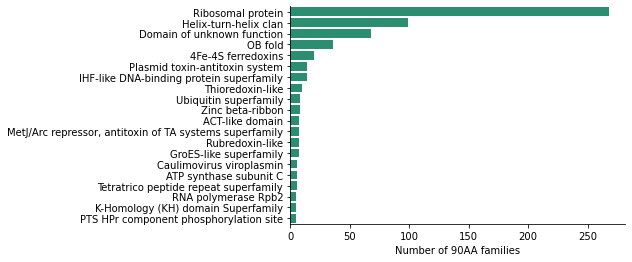

In [11]:
fig = plt.figure()
ax= sns.barplot(data=count,y='Pfam',x='count',color='#1b9e77')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel('')
plt.xlabel('Number of 90AA families')

In [8]:
# select multi-phylum 90AA families with >100 species
df_species = df[df['species_number']>100]
df_species.sort_values('smorf')

,group,smorf,multi,specific,smorf number of family,species_number,cdd,query_length,score,align_length,...,tcov,habitat,accession,short_name,description,PSSM_Length,clan_id,clan,short_description,clan_description
3653,NaN,GMSC10.90AA.000_287_924_202,phylum-multi,kingdom-specific,560,116,NaN,NaN,NaN,NaN,...,NaN,"activated sludge,air,algae associated,anthropo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1776,NaN,GMSC10.90AA.000_287_926_092,phylum-multi,kingdom-specific,710,114,274689.0,98.0,424.0,93.0,...,0.861111,"activated sludge,anthropogenic,beatle gut,buil...",TIGR03632,uS11_bact,"ribosomal protein uS11, bacterial form. This m...",108.0,NaN,NaN,NaN,NaN
1777,Ribosomal protein,GMSC10.90AA.000_287_926_092,phylum-multi,kingdom-specific,710,114,306838.0,98.0,318.0,89.0,...,0.816514,"activated sludge,anthropogenic,beatle gut,buil...",pfam00411,Ribosomal_S11,Ribosomal protein S11.,109.0,CL0267,S11_L18p,Ribosomal protein S11,Ribosomal protein S11/L18p superfamily
1530,NaN,GMSC10.90AA.000_287_926_530,phylum-multi,kingdom-specific,866,104,NaN,NaN,NaN,NaN,...,NaN,"activated sludge,air,algae associated,anthropo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2440,NaN,GMSC10.90AA.000_287_926_744,phylum-multi,kingdom-specific,1483,222,NaN,NaN,NaN,NaN,...,NaN,"activated sludge,anthropogenic,bat gut,beatle ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2793,NaN,GMSC10.90AA.000_287_926_804,phylum-multi,kingdom-specific,1128,186,NaN,NaN,NaN,NaN,...,NaN,"activated sludge,air,anthropogenic,bear gut,be...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1940,NaN,GMSC10.90AA.000_287_926_822,phylum-multi,kingdom-specific,1006,115,NaN,NaN,NaN,NaN,...,NaN,"activated sludge,air,anthropogenic,beatle gut,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2420,NaN,GMSC10.90AA.000_287_926_824,kingdom-multi,NaN,626,131,NaN,NaN,NaN,NaN,...,NaN,"activated sludge,air,anthropogenic,bear gut,be...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2026,Metal-sensitive transcriptional repressor,GMSC10.90AA.000_287_926_836,phylum-multi,kingdom-specific,993,136,426851.0,99.0,240.0,81.0,...,1.012500,"air,built environment,cat gut,cattle gut,cattl...",pfam02583,Trns_repr_metal,Metal-sensitive transcriptional repressor. Thi...,80.0,NaN,NaN,Metal-sensitive transcriptional repressor,NaN
2024,NaN,GMSC10.90AA.000_287_926_836,phylum-multi,kingdom-specific,993,136,197395.0,99.0,391.0,85.0,...,1.000000,"air,built environment,cat gut,cattle gut,cattl...",cd10160,CsoR-like_DUF156_3,Uncharacterized family 3; belongs to a superfa...,85.0,NaN,NaN,NaN,NaN


In [29]:
# map habitats and calculate habitats fraction 
def count_habitat(infile1,infile2,outfile):
    habitat = {}
    all = {}
    with open(infile1,'rt') as f:
        for line in f:    
            linelist = line.strip().split('\t')
            habitat[linelist[0]] = linelist[4]
            if linelist[4] not in all.keys():
                all[linelist[4]] = 1
            else:
                all[linelist[4]] += 1            

    number = {}
    with open(outfile,'wt') as out:
        with open(infile2,'rt') as f:
            for line in f:
                smorf,samples = line.strip().split('\t')
                samples_list = samples.split(',')
                for item in samples_list:
                    if item != 'isolated genome':
                        if habitat[item] not in number.keys():
                            number[habitat[item]] = 1
                        else:
                            number[habitat[item]] += 1
                for key,value in number.items():
                    value = value/all[key]
                    out.write(f'{smorf}\t{key}\t{value}\n')
                number = {}

infile1 = './data/figure2/sample_habitat_general_higher.tsv'
infile2 = './data/figure2/housekeeping_sample.txt'
outfile = './data/figure2/housekeeping_habitat.txt'

count_habitat(infile1,infile2,outfile)

In [31]:
df = pd.read_csv('./data/figure2/housekeeping_habitat.txt',sep='\t',header=None,names=['family','habitat','fraction'])
df = df.pivot(columns='habitat',index='family',values='fraction')
df.to_csv('./data/figure2/housekeeping_habitat_fraction.txt',sep='\t')
df

habitat,anthropogenic,aquatic,human gut,mammal gut,other,other animal,other human,soil/plant
family,,,,,,,,
GMSC10.90AA.000_287_924_202,0.018134,0.014141,0.000030,0.000845,0.011519,0.013733,0.002007,0.082639
GMSC10.90AA.000_287_926_092,0.006762,0.000461,0.038597,0.228950,0.002880,0.116105,0.012263,0.000532
GMSC10.90AA.000_287_926_530,0.062394,0.061328,0.000516,0.006477,0.015839,0.016230,0.009142,0.121121
GMSC10.90AA.000_287_926_744,0.015214,0.001383,0.071029,0.270346,0.000720,0.171452,0.018283,0.001241
GMSC10.90AA.000_287_926_804,0.104810,0.146941,0.000638,0.004506,0.046076,0.016646,0.024972,0.121653
GMSC10.90AA.000_287_926_822,0.060704,0.126345,0.000121,0.004506,0.017279,0.007491,0.005351,0.173967
GMSC10.90AA.000_287_926_824,0.035347,0.009991,0.142940,0.539848,0.005760,0.199334,0.001561,0.012591
GMSC10.90AA.000_287_926_836,0.011372,0.000769,0.281810,0.234019,0.000720,0.268414,0.002453,0.001419
GMSC10.90AA.000_287_926_841,0.055940,0.072395,0.000182,0.000563,0.018719,0.014565,0.001561,0.338535


In [32]:
df = pd.read_csv(r'./data/figure2/housekeeping_habitat_fraction.txt',sep='\t')
df['family'] = df['family'].str.replace('GMSC10.90AA.000_','')
df=df.set_index('family')
df

,anthropogenic,aquatic,human gut,mammal gut,other,other animal,other human,soil/plant
family,,,,,,,,
287_924_202,0.018134,0.014141,0.000030,0.000845,0.011519,0.013733,0.002007,0.082639
287_926_092,0.006762,0.000461,0.038597,0.228950,0.002880,0.116105,0.012263,0.000532
287_926_530,0.062394,0.061328,0.000516,0.006477,0.015839,0.016230,0.009142,0.121121
287_926_744,0.015214,0.001383,0.071029,0.270346,0.000720,0.171452,0.018283,0.001241
287_926_804,0.104810,0.146941,0.000638,0.004506,0.046076,0.016646,0.024972,0.121653
287_926_822,0.060704,0.126345,0.000121,0.004506,0.017279,0.007491,0.005351,0.173967
287_926_824,0.035347,0.009991,0.142940,0.539848,0.005760,0.199334,0.001561,0.012591
287_926_836,0.011372,0.000769,0.281810,0.234019,0.000720,0.268414,0.002453,0.001419
287_926_841,0.055940,0.072395,0.000182,0.000563,0.018719,0.014565,0.001561,0.338535


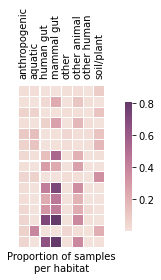

In [35]:
fig, ax = plt.subplots()
#sns.heatmap(df,square=True,cmap=sns.cubehelix_palette(dark=.3,light=0.9,as_cmap=True),linewidth=.1,xticklabels=False,yticklabels=False)
sns.heatmap(df,square=True,cmap=sns.cubehelix_palette(dark=.3,light=0.9,as_cmap=True),linewidth=.1, xticklabels=df.columns,yticklabels=df.index,cbar_kws={"shrink": 0.8})
#sns.heatmap(df,square=True,cmap=sns.cubehelix_palette(dark=.3,light=0.9,as_cmap=True),linewidth=.1, xticklabels=df.columns,yticklabels=df.index,cbar_kws={'orientation': 'horizontal',"shrink": 0.5})

ax.xaxis.tick_top()
ax.set_xticklabels(df.columns,rotation=90)

ax.set_yticklabels('')
ax.set(ylabel="")
ax.set(xlabel="Proportion of samples\nper habitat")

ax.tick_params(left=False) 
ax.tick_params(top=False) 

plt.tight_layout()

In [36]:
# calculate taxonomy number
df = pd.read_csv(r'./data/figure2/housekeeping_taxonomy.txt',sep='\t',header=None,names=['90AA family','old','smorf','domain','phylum','class','order','family','genus','species'])
df

,90AA family,old,smorf,domain,phylum,class,order,family,genus,species
0,GMSC10.90AA.000_287_926_849,GMSC10.SMORF.001_957_057_907,GMSC10.SMORF.000_000_022_949,d__Bacteria,NaN,NaN,NaN,NaN,NaN,NaN
1,GMSC10.90AA.000_287_926_849,GMSC10.SMORF.001_957_057_907,GMSC10.SMORF.000_000_028_373,d__Bacteria,NaN,NaN,NaN,NaN,NaN,NaN
2,GMSC10.90AA.000_287_926_849,GMSC10.SMORF.001_957_057_907,GMSC10.SMORF.000_000_067_007,d__Bacteria,NaN,NaN,NaN,NaN,NaN,NaN
3,GMSC10.90AA.000_287_926_849,GMSC10.SMORF.001_957_057_907,GMSC10.SMORF.000_000_073_484,d__Bacteria,NaN,NaN,NaN,NaN,NaN,NaN
4,GMSC10.90AA.000_287_926_849,GMSC10.SMORF.001_957_057_907,GMSC10.SMORF.000_000_076_137,d__Bacteria,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
19319,GMSC10.90AA.000_287_926_841,GMSC10.SMORF.002_160_097_109,GMSC10.SMORF.003_741_557_348,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,NaN,NaN,NaN,NaN
19320,GMSC10.90AA.000_287_926_841,GMSC10.SMORF.002_160_097_109,GMSC10.SMORF.002_912_184_297,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,NaN,NaN,NaN,NaN
19321,GMSC10.90AA.000_287_926_841,GMSC10.SMORF.002_160_097_109,GMSC10.SMORF.002_579_344_661,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Parvibaculales,f__Parvibaculaceae,g__Parvibaculum,s__Parvibaculum lavamentivorans
19322,GMSC10.90AA.000_287_926_841,GMSC10.SMORF.002_160_097_109,GMSC10.SMORF.002_085_368_852,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,NaN,NaN,NaN,NaN


In [37]:
count = df.groupby(['90AA family','phylum'])['smorf'].count()
count.to_csv(r'./data/figure2/housekeeping_tax_count.tsv',sep='\t')
count

90AA family                  phylum              
GMSC10.90AA.000_287_924_202  p__Actinobacteriota      303
                             p__Dormibacterota         41
                             p__Proteobacteria        111
                             p__Verrucomicrobiota       1
GMSC10.90AA.000_287_926_092  p__Bacteroidota          661
                                                     ... 
GMSC10.90AA.000_287_926_867  p__Firmicutes_A            1
                             p__Patescibacteria         1
                             p__Proteobacteria       1867
GMSC10.90AA.000_287_926_868  p__Firmicutes              4
                             p__Firmicutes_A         1614
Name: smorf, Length: 84, dtype: int64

In [42]:
df = pd.read_csv(r'./data/figure2/housekeeping_tax_count.tsv',sep='\t')
df['phylum'] = df['phylum'].str.replace('p__','')
df['90AA family'] = df['90AA family'].str.replace('GMSC10.90AA.000_','')
# change taxonomy name by GTDB r214   
df['phylum'] = df['phylum'].str.replace('Actinobacteriota','Actinomycetota')
df['phylum'] = df['phylum'].str.replace('Cyanobacteria','Cyanobacteriota')
df['phylum'] = df['phylum'].str.replace('Firmicutes','Bacillota')
df['phylum'] = df['phylum'].str.replace('Firmicutes_A','Bacillota_A')
df['phylum'] = df['phylum'].str.replace('Firmicutes_B','Bacillota_B')
df['phylum'] = df['phylum'].str.replace('Firmicutes_C','Bacillota_C')
df['phylum'] = df['phylum'].str.replace('Proteobacteria','Pseudomonadota')
df['phylum'] = df['phylum'].str.replace('Verrucomicrobiota_A','Chlamydiota')
df

,90AA family,phylum,smorf
0,287_924_202,Actinomycetota,303
1,287_924_202,Dormibacterota,41
2,287_924_202,Pseudomonadota,111
3,287_924_202,Verrucomicrobiota,1
4,287_926_092,Bacteroidota,661
...,...,...,...
79,287_926_867,Bacillota_A,1
80,287_926_867,Patescibacteria,1
81,287_926_867,Pseudomonadota,1867
82,287_926_868,Bacillota,4


In [43]:
fdata = df.pivot(columns='phylum',index='90AA family',values='smorf')
fdata

phylum,Acidobacteriota,Actinomycetota,Bacillota,Bacillota_A,Bacillota_B,Bacillota_C,Bacteroidota,Chlamydiota,Chloroflexota,Cyanobacteriota,...,Myxococcota,Patescibacteria,Planctomycetota,Pseudomonadota,Riflebacteria,Spirochaetota,Synergistota,UBP6,Verrucomicrobiota,Wallbacteria
90AA family,,,,,,,,,,,,,,,,,,,,,
287_924_202,NaN,303.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,1.0,NaN
287_926_092,NaN,NaN,NaN,1.0,NaN,NaN,661.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287_926_530,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,737.0,NaN,NaN,NaN,NaN,NaN,NaN
287_926_744,NaN,30.0,68.0,770.0,NaN,10.0,169.0,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,17.0,NaN,NaN,NaN,NaN
287_926_804,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1066.0,NaN,NaN,NaN,NaN,5.0,NaN
287_926_822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,996.0,NaN,NaN,NaN,NaN,NaN,NaN
287_926_824,1.0,16.0,26.0,308.0,NaN,1.0,15.0,NaN,NaN,1.0,...,2.0,NaN,1.0,1.0,NaN,1.0,4.0,NaN,8.0,2.0
287_926_836,NaN,19.0,7.0,721.0,1.0,22.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN
287_926_841,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1949.0,NaN,NaN,NaN,NaN,NaN,NaN


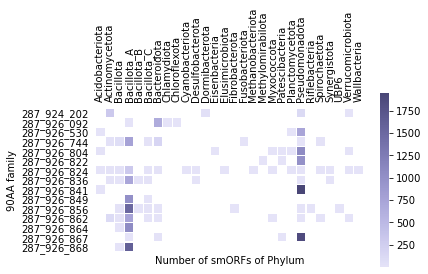

In [44]:
fig, ax = plt.subplots()
sns.heatmap(fdata,square=True,cmap=sns.cubehelix_palette(rot=0,dark=.3,light=0.9,as_cmap=True),linewidth=.1, xticklabels=fdata.columns,yticklabels=fdata.index,cbar_kws={"shrink": 0.8})
#sns.heatmap(fdata,square=True,cmap=sns.cubehelix_palette(rot=0,dark=.3,light=0.9,as_cmap=True),linewidth=.1, xticklabels=fdata.columns,yticklabels=fdata.index,cbar_kws={'orientation': 'horizontal',"shrink": 0.5})
ax.set(xlabel="Number of smORFs of Phylum")

ax.xaxis.tick_top()
ax.set_xticklabels(fdata.columns,rotation=90)
ax.tick_params(left=False) 
ax.tick_params(top=False) 